# Reward and Risk

    SPDR S&P 500 ETF Trust (SPY)
    Vanguard Russell 2000 ETF (VTWO)
    Invesco QQQ ETF (QQQ)
    Schwab US Dividend Equity ETF (SCHD)
    Vanguard Total Stock Market ETF (VTI)
    iShares ESG Aware MSCI USA ETF (ESGU)
    Invesco Optimum Yield Diversified Commodity Strategy No K-1 ETF (PDBC)
    Vanguard FTSE Emerging Markets ETF (VWO)
    Vanguard Long-Term Corporate Bond ETF (VCLT) 

In [25]:
symbols = ['VWO','PDBC','SPY','VTWO','ESGU','QQQ','VTI','SCHD','VCLT']

## 01. Returns

In [ ]:
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set()
pd.options.display.float_format = '{:.4f}'.format 

In [6]:
n_years = 4
from datetime import datetime, timedelta
end = datetime.utcnow()
start = end - timedelta(days= 365 * n_years)
start

datetime.datetime(2017, 12, 30, 8, 7, 59, 328889)

In [26]:
df = yf.download(symbols, start = str(start).split()[0], end = str(end).split()[0])
df.head()

[*********************100%***********************]  9 of 9 completed


Adj Close                   ...   Volume                  
                ESGU    PDBC      QQQ  ...      VTI    VTWO       VWO
Date                                   ...                           
2018-01-02   55.1403 11.1386 154.2519  ...  3699700  214600  17804600
2018-01-03   55.6119 11.2021 155.7507  ...  3052300   89800  17896200
2018-01-04   55.9043 11.2084 156.0233  ...  2572400  148000  13003300
2018-01-05   56.1590 11.1640 157.5902  ...  2188500   87400  12102300
2018-01-08   56.3316 11.1577 158.2034  ...  2655300   93400  10947500

[5 rows x 54 columns]

In [27]:
close = df.Close.dropna().copy()
close.head()

,ESGU,PDBC,QQQ,SCHD,SPY,VCLT,VTI,VTWO,VWO
Date,,,,,,,,,
2018-01-02,58.4600,17.5500,158.4900,51.3300,268.7700,94.8400,138.2200,61.7250,46.7000
2018-01-03,58.9600,17.6500,160.0300,51.4800,270.4700,95.3500,139.0200,61.7850,47.1500
2018-01-04,59.2700,17.6600,160.3100,51.7300,271.6100,95.2500,139.5500,61.9600,47.4400
2018-01-05,59.5400,17.5900,161.9200,52.0500,273.4200,95.1100,140.3700,62.1500,47.8600
2018-01-08,59.7230,17.5800,162.5500,52.1600,273.9200,95.1400,140.6900,62.2150,47.8700


In [39]:
returns = close.copy()
for column in close.columns:
  return_name = str(column) + "_return"
  returns[column] = close[column].pct_change()

returns.head()

,ESGU,PDBC,QQQ,SCHD,SPY,VCLT,VTI,VTWO,VWO
Date,,,,,,,,,
2018-01-02,nan,nan,nan,nan,nan,nan,nan,nan,nan
2018-01-03,0.0086,0.0057,0.0097,0.0029,0.0063,0.0054,0.0058,0.0010,0.0096
2018-01-04,0.0053,0.0006,0.0017,0.0049,0.0042,-0.0010,0.0038,0.0028,0.0062
2018-01-05,0.0046,-0.0040,0.0100,0.0062,0.0067,-0.0015,0.0059,0.0031,0.0089
2018-01-08,0.0031,-0.0006,0.0039,0.0021,0.0018,0.0003,0.0023,0.0010,0.0002


In [40]:
returns.QQQ.describe()

count   1004.0000
mean       0.0010
std        0.0154
min       -0.1198
25%       -0.0050
50%        0.0019
75%        0.0085
max        0.0847
Name: QQQ, dtype: float64

### price

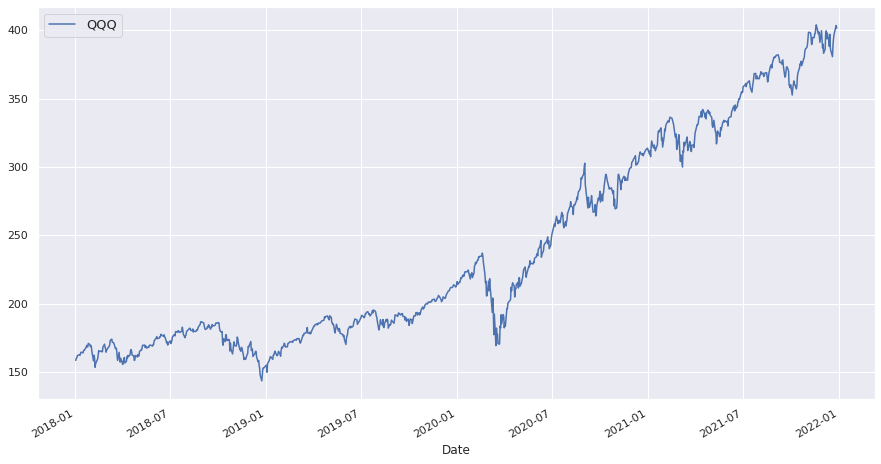

In [41]:
close.QQQ.plot(figsize = (15,8))
plt.legend(fontsize = 13)
plt.show()

### normalized price

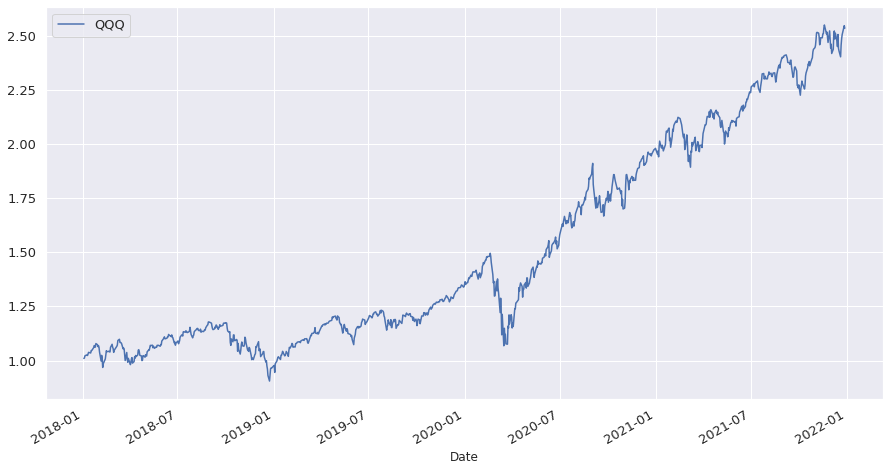

In [42]:
(1 + returns.QQQ).cumprod().plot(figsize = (15,8),fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## 02. Reward (Positive returns)

### Arithmetic mean return

In [43]:
mu = returns.QQQ.mean()
mu

0.0010459437132343831

## 03. Risk (Volatility of returns)

### Standard Deviation of Returns

In [44]:
sigma = returns.QQQ.std() 
sigma

0.015418187265130976

## 04. Summary

In [45]:
risk_reward = pd.DataFrame(columns = ['reward','risk'])

for column in returns.columns.values:
  mu = returns[column].mean()
  sigma = returns[column].std()
  risk_reward.loc[column] = [mu,sigma]

risk_reward

,reward,risk
ESGU,0.0007,0.0135
PDBC,-0.0001,0.0145
QQQ,0.0010,0.0154
SCHD,0.0005,0.0133
SPY,0.0007,0.0132
VCLT,0.0002,0.0089
VTI,0.0007,0.0134
VTWO,0.0005,0.0165
VWO,0.0002,0.0140


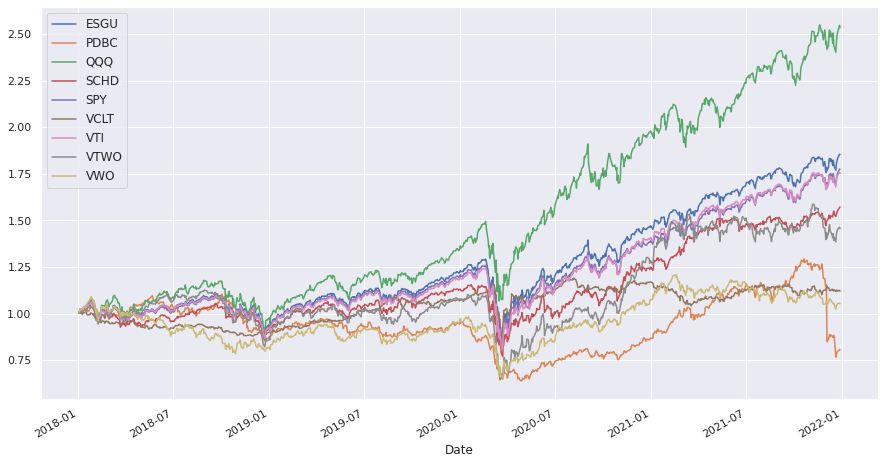

In [54]:
(1 + returns).cumprod().plot(figsize = (15,8))
plt.legend(fontsize = 12)
plt.show()